In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import time

import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten

In [2]:
#load data imports two tuples - each tuple has two arrays
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [75]:
#scaling to ease computational burden of model
#note: scaling does not change the way the image renders
x_train_scaled = x_train/255
x_test_scaled = x_test/255

#convert to float 32 to use less space, float64 uses twice as much memory
x_train_scaled_32 = x_train_scaled.astype('float32')
x_test_scaled_32 = x_test_scaled.astype('float32')

#reshape to 4d array with expected input shape of (batch, rows, columns, channels)
x_train_scaled_shape = x_train_scaled_32.reshape(x_train_scaled_32.shape[0], 28, 28, 1)
x_test_scaled_shape = x_test_scaled_32.reshape(x_test_scaled_32.shape[0], 28, 28, 1)

#convert labels to one-hot-encoded arrays
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [81]:
x_train_scaled_32.shape

(60000, 28, 28)

In [202]:
#model 1: 1 convolutional layer, one dense layer
#what happens when you remove flatten?
#test effect of kernel size
#test effect of number of filters
#test effect of number of layers
#test effect of maxpooling
kernels = [(3,3), (5,5), (10,10), (28,28)]
results_kernel = pd.DataFrame()
for kernel in kernels:
    model_kernel = Sequential([Conv2D(filters=10, kernel_size=kernel, activation='relu', input_shape=x_train_scaled_shape.shape[1:]),
                        Flatten(),
                       Dense(10, activation='softmax')])
    
    model_kernel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    #calculate time per model
    start_time = time.time()
    epochs=5
    results = model_kernel.fit(x_train_scaled_shape, y_train_cat, batch_size=100, epochs=epochs, verbose=0, validation_split=0.2)
    end_time = time.time()
    model_time = end_time-start_time
    
    #append model history to results_kernel dataframe
    history = pd.DataFrame(results.history)
    history['kernel_dim'] = kernel[0]
    history['model_time'] = model_time
    history['epoch'] = list(range(1,epochs+1))
    results_kernel = results_kernel.append(history)
    

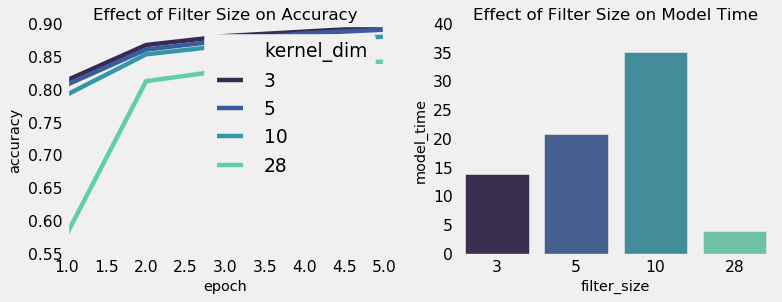

In [203]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes = axes.flatten()

palette_size = len(results_kernel['kernel_dim'].unique())
plt.style.use('fivethirtyeight')
sns.lineplot(results_kernel['epoch'], results_kernel['accuracy'], hue=results_kernel['kernel_dim'],
            palette=sns.color_palette("mako", palette_size),ax = axes[0])
axes[0].set_title('Effect of Filter Size on Accuracy',size=15)
axes[0].set_xlabel('epoch',size=13)
axes[0].set_ylabel('accuracy', size=13)
axes[0].grid(False)

sns.barplot(results_kernel['kernel_dim'], results_kernel['model_time'], palette='mako', ax=axes[1])
axes[1].set_title('Effect of Filter Size on Model Time',size=15)
axes[1].set_xlabel('filter_size',size=13)
axes[1].set_ylabel('model_time', size=13)
axes[1].grid(False)
plt.tight_layout()

In [208]:
filters = [5,10,30,50]
results_kernel = pd.DataFrame()
for filter_num in filters:
    model_kernel = Sequential([Conv2D(filters=10, kernel_size=(3,3), activation='relu', input_shape=x_train_scaled_shape.shape[1:]),
                        Flatten(),
                       Dense(10, activation='softmax')])
    
    model_kernel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    #calculate time per model
    start_time = time.time()
    epochs=5
    results = model_kernel.fit(x_train_scaled_shape, y_train_cat, batch_size=100, epochs=epochs, verbose=0, validation_split=0.2)
    end_time = time.time()
    model_time = end_time-start_time
    
    #append model history to results_kernel dataframe
    history = pd.DataFrame(results.history)
    history['filters'] = filter_num
    history['model_time'] = model_time
    history['epoch'] = list(range(1,epochs+1))
    results_kernel = results_kernel.append(history)
    

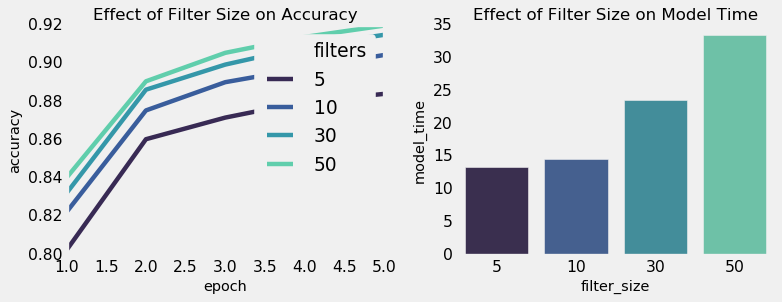

In [211]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes = axes.flatten()

palette_size = len(results_kernel['filters'].unique())
plt.style.use('fivethirtyeight')
sns.lineplot(results_kernel['epoch'], results_kernel['accuracy'], hue=results_kernel['filters'],
            palette=sns.color_palette("mako", palette_size),ax = axes[0])
axes[0].set_title('Effect of Filter Size on Accuracy',size=15)
axes[0].set_xlabel('epoch',size=13)
axes[0].set_ylabel('accuracy', size=13)
axes[0].grid(False)

sns.barplot(results_kernel['filters'], results_kernel['model_time'], palette='mako', ax=axes[1])
axes[1].set_title('Effect of Filter Size on Model Time',size=15)
axes[1].set_xlabel('filter_size',size=13)
axes[1].set_ylabel('model_time', size=13)
axes[1].grid(False)
plt.tight_layout()

In [230]:
def function(pos_argument, *args, **kwargs):
    print(pos_argument)
    print(*args)
    print(args)
    print(kwargs)
    print(*kwargs)

In [324]:
def my_sum(*args, **kwargs):
    #args is a tuple of the variable length positional arguments
    print('args')
    print(args)
    #*args is the args tuple, unpacked
    print('*args')
    print(*args)
    #kwargs is a dictionary of the variable length keyword arguments
    #note you cannot do **kwargs because you can't unpack a dictionary
    #you can do *kwargs to unpack the keys, the items, or the values
    #the items will be unpacked as tuples
    print('*kwargs')
    print(*kwargs)
    print('*kwargs.values')
    print(*kwargs.values())
    print('*kwargs.items')
    print(*kwargs.items())
    print("kwargs['test']")
    print(kwargs['test'])

In [328]:
mydict={'test':1, 'me':3}
mydict = (1,23,3,4)
for d in mydict:
    print(d)

1
23
3
4


In [355]:
def concatenate(**kwargs):
    print(kwargs)
    print(kwargs.keys())
    print(kwargs.items())
    print(kwargs.values())
    print(*kwargs)
    
concatenate(a='Real',b='Python')

{'a': 'Real', 'b': 'Python'}
dict_keys(['a', 'b'])
dict_items([('a', 'Real'), ('b', 'Python')])
dict_values(['Real', 'Python'])
a b


In [354]:
test = {'a':'Real', 'b':'Python'}
print(test)
print(test.keys())
print(test.items())
print(test.values())
print(*test)

{'a': 'Real', 'b': 'Python'}
dict_keys(['a', 'b'])
dict_items([('a', 'Real'), ('b', 'Python')])
dict_values(['Real', 'Python'])
a b


In [311]:
def add(a,b):
    return a + b

t = {1:4, 2:3}
print(*t)

1 2


In [305]:
function(10, 11, 12, 13, test = 14)

10
11 12 13
(11, 12, 13)
{'test': 14}
test


In [517]:
class CNN:
    def __init__(self, **kwargs):
        self.kwargs = kwargs
        self.metric = kwargs.keys()
        self.test_values = kwargs.values()
        self.initial_model = self.get_model()
        self.models = self.model_test()
        
    def get_model(self, filter_value=5, kernel_value=(5,5)):
        initial_model = Sequential([Conv2D(filters=filter_value, kernel_size=kernel_value, activation='relu', input_shape=x_train_scaled_shape.shape[1:]),
                            Flatten(),
                           Dense(10, activation='softmax')])
        return initial_model
    
    def model_test(self):
        kwargs = self.kwargs
        metric = kwargs.keys()
        test_values = kwargs.values()
        models=[]
        for value in list(*test_values): 
            model_test = self.get_model(kernel_value=value)
            models.append(model_test)
        return models

In [519]:
mycnn = CNN(kernel=[(5,10),(10,10)])
test = mycnn.model_test()
mycnn.models

In [415]:
def test_model(value, **kwargs):
    if kwargs:
        test_metric = kwargs.keys()
        test_values = kwargs.values()
        myitems = kwargs.items()
        print(list(test_metric)[0], list(test_values)[0], list(myitems)[0])
    else:
        print(value)

In [416]:
test_model(3, filters=3,test=4)

filters 3 ('filters', 3)


In [389]:
mydict={'filters':[3,4]}
mydict.items()

dict_items([('filters', [3, 4])])